#Gradient Descent

Gradient descent is one of the core ideas behind how machine learning models learn and improve. It is an iterative optimization algorithm used to minimize a loss function which measures of how far off the model's predictions are from the actual values. In simple terms, gradient descent adjusts the model's parameters step by step to find the combination that produces the smallest possible error between predicted and actual outcomes.

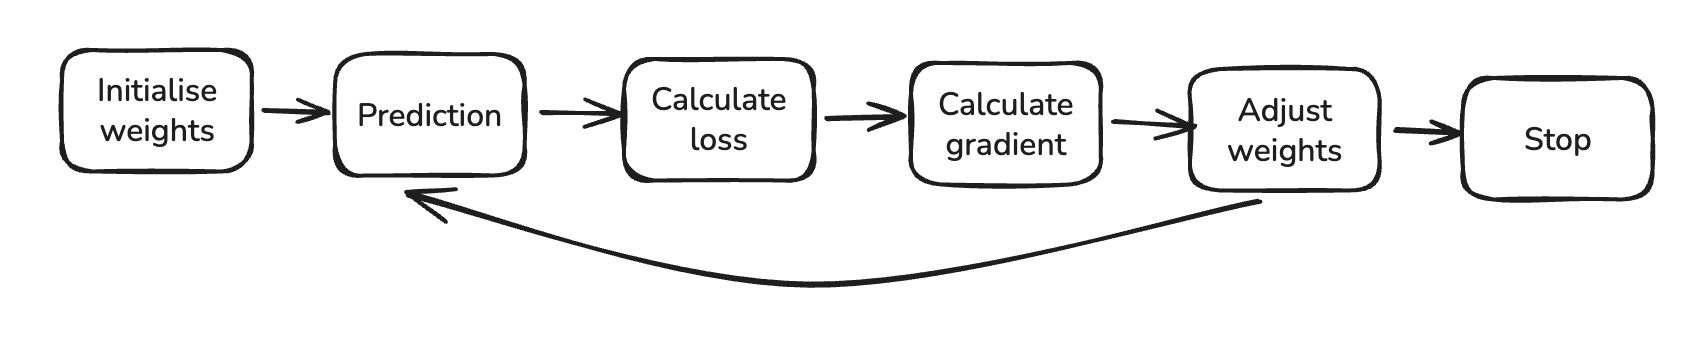

Here are the steps to implement Gradient Descent — the process by which a model learns and improves:

1. **Initialise weights**
2. Make a **prediction** using those weights
3. **Calculate the loss** (how far the prediction is from the actual value)
4. **Calculate the gradient** - measures how changing the weights affects the loss
5. **Adjust the weights** in the direction that reduces loss
6. Repeat until training is complete

## Step 1: Initialisation

In [16]:
import torch
from functools import partial

#sample data
x = torch.linspace(-3, 3, 100)
y = 2 * x**2 + 3 * x + 1

#abc are the weights
abc = torch.tensor([1.0, 1.0, 1.0], requires_grad=True)


## Step 2: Prediction

In [19]:
# Define the quadratic function
def quad(a, b, c, x):
    return a * x**2 + b * x + c

# Create a version of quad that only needs x
def mk_quad(a, b, c):
    return partial(quad, a, b, c)

f = mk_quad(*abc)
preds = f(x)


## Step 3: Calculate Loss

In [10]:
# Define Mean Absolute Error (MAE)
def mae(preds, acts):
    return (torch.abs(preds - acts)).mean()

loss = mae(preds, y)
print(f"Initial loss = {loss.item():.4f}")


Initial loss = 3.5008


## Step 4: Calculate Gradient

In [11]:
loss.backward()
print(f"Gradients: {abc.grad}")


Gradients: tensor([-4.3616, -1.3200, -0.6800])


## Step 5: Adjust Weights

The gradient shows the slope — the direction of steepest increase of the loss.
So, to minimize the loss, we step in the opposite direction of the gradient

In [12]:
lr = 0.01

with torch.no_grad():
    abc -= abc.grad * lr
    abc.grad.zero_()

print(f"Updated parameters: {abc}")


Updated parameters: tensor([1.0436, 1.0132, 1.0068], requires_grad=True)


The learning rate (lr) controls how big or small the steps should be when adjusting the weights

## Step 6: Repeat

In [14]:
def quad_mae(params):
    f = mk_quad(*params)
    preds = f(x)
    return mae(preds, y)

for i in range(10):
    loss = quad_mae(abc)
    loss.backward()

    with torch.no_grad():
        abc -= abc.grad * lr
        abc.grad.zero_()

    print(f"Step={i:2d} | Loss={loss.item():.4f}")


Step= 0 | Loss=3.0000
Step= 1 | Loss=2.9704
Step= 2 | Loss=2.9414
Step= 3 | Loss=2.9142
Step= 4 | Loss=2.8874
Step= 5 | Loss=2.8622
Step= 6 | Loss=2.8372
Step= 7 | Loss=2.8138
Step= 8 | Loss=2.7904
Step= 9 | Loss=2.7672
